In [22]:
import sys
import os
import json
sys.path.append("../vitamin_c")
from vitamin_c_fit import plot_posterior, get_params
from load_data_fit import DataLoader
import h5py
import numpy as np
import copy
import matplotlib.pyplot as plt
import corner

In [24]:
%matplotlib inline

In [25]:
load_dir = "/home/joseph.bayley/data/CBC/O4MDC/training_sets_realnoise_2det_15par_1024Hz_1s_fullparam_massconstrain_corr/tset_tot-10000000_split-1000"

In [26]:
test_dir = "/home/joseph.bayley/data/CBC/O4MDC/test_sets/1024Hz_1s_full_15par_2det_fullparam_massconstrain_corr/test_waveforms"

In [27]:
params_dir = "../vitamin_c/params_files_1024_1s_corrected"
params = os.path.join(params_dir, 'params.json')
bounds = os.path.join(params_dir, 'bounds.json')
fixed_vals = os.path.join(params_dir, 'fixed_vals.json')

with open(params, 'r') as fp:
    params = json.load(fp)
with open(bounds, 'r') as fp:
    bounds = json.load(fp)
with open(fixed_vals, 'r') as fp:
    fixed_vals = json.load(fp)

In [28]:
params, bounds, masks, fixed_vals = get_params(params, bounds, fixed_vals, params_dir = params_dir)

... converted RA bounds to hour angle
[False, False, True, False, False, False, False, False, False, False, False, False, False, True, True]
[True, True, False, True, True, True, True, True, True, True, True, True, True, False, False]
[ 3  4  0  5  6  7  8  9 10 11 12 13 14  1  2]
['mass_1', 'mass_2', 'luminosity_distance', 'geocent_time', 'phase', 'theta_jn', 'psi', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'ra', 'dec']
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False] []
[False, False, True, True, True, True, True, True, True, True, True, True, True, True, True] [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False] [0]
[False, True, False, False, False, False, False, False, False, False, False, False, False, False, False] [1]
[False, False, False, False, False, False, False, False, False, False, False, False, False, False,

In [29]:
dt = DataLoader(load_dir, params = params, bounds = bounds, fixed_vals = fixed_vals, masks=masks,test_set = False, chunk_batch=3)

In [30]:
dt.load_next_chunk()

/home/joseph.bayley/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
../vitamin_c/load_data_fit.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data['x_data'] = np.concatenate(np.array(data['x_data']), axis=0).squeeze()
../vitamin_c/load_data_fit.py:176: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you m

datashape (2,) (2,)
load_time chunk 0: 1.230193853378296


In [9]:
np.where(dt.X[:,1] < 0.4)

(array([   1,    2,    3, ..., 1530, 1531, 1532]),)

In [10]:
masses = dt.X[:,0:2]*(90) + 10

In [11]:
masses[14]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([81.48818 , 48.966164], dtype=float32)>

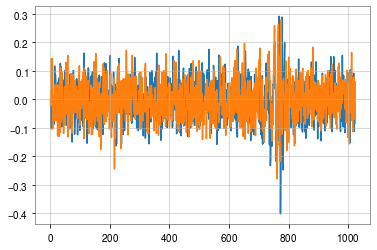

In [21]:
fig, ax = plt.subplots()
ax.plot(dt.Y_noisefree[7])

In [39]:
data={'x_data': [], 'y_data_noisefree': [], 'y_data_noisy': [], 'rand_pars': [], 'snrs': []}

In [40]:
h5py_file = h5py.File(os.path.join(load_dir,os.listdir(load_dir)[0]), 'r')

In [41]:
data['x_data'].append(h5py_file['x_data'])
data['x_data'] = np.concatenate(np.array(data['x_data']), axis=0).squeeze()
data['y_data_noisefree'].append(h5py_file['y_data_noisefree'])
data['y_data_noisefree'] = np.concatenate(np.array(data['y_data_noisefree']), axis=0).squeeze()
data['rand_pars'] = h5py_file['rand_pars']

In [15]:
new_xdata = dt.convert_parameters(copy.copy(data["x_data"]))

In [16]:
rec_xdata = dt.unconvert_parameters(copy.copy(new_xdata))

In [22]:
data["x_data"][0:2]

array([[4.15177123e+01, 2.73858496e+01, 1.30762476e+03,
        3.11436415e-01, 2.30622900e-01, 1.46849202e+00,
        1.18541369e+00, 1.96933091e-01, 7.02725393e-01,
        2.81444198e+00, 1.70297974e+00, 5.59391897e-01,
        4.20421726e+00, 1.19645705e+00, 1.60132903e-01],
       [4.79246451e+01, 2.57624134e+01, 2.05421102e+02,
        3.14928770e-01, 4.12990823e+00, 1.55920879e+00,
        2.00542225e+00, 5.73053929e-01, 7.42459247e-01,
        1.69530591e+00, 2.39158839e+00, 8.08092269e-01,
        1.62430574e+00, 1.34626651e+00, 1.51712339e-01]])

In [23]:
new_xdata[0:2]

array([[0.3501968 , 0.19317611, 0.24645403, 0.80718207,
        0.45073845, 0.46743553, 0.7546578 , 0.19892231,
        0.70982363, 0.89586471, 0.54207529, 0.08902999,
        0.66912196, 0.19042205, 0.55097189],
       [0.42138495, 0.17513793, 0.02151451, 0.82464385,
        0.95293635, 0.49631157, 0.27669146, 0.57884235,
        0.74995884, 0.53963263, 0.76126623, 0.12861188,
        0.25851629, 0.21426497, 0.54829154]])

In [24]:
rec_xdata[0:2]

array([[4.15177123e+01, 2.73858496e+01, 1.30762476e+03,
        3.11436415e-01, 4.94301188e+00, 1.46849202e+00,
        2.75621002e+00, 1.96933091e-01, 7.02725393e-01,
        2.81444198e+00, 1.70297974e+00, 5.59391897e-01,
        4.20421726e+00, 1.19645705e+00, 1.60132903e-01],
       [4.79246451e+01, 2.57624134e+01, 2.05421102e+02,
        3.14928770e-01, 4.12990823e+00, 1.55920879e+00,
        2.00542225e+00, 5.73053929e-01, 7.42459247e-01,
        1.69530591e+00, 2.39158839e+00, 8.08092269e-01,
        1.62430574e+00, 1.34626651e+00, 1.51712339e-01]])

In [19]:
diffd = data["x_data"] - rec_xdata

In [20]:
maxdiff = np.max(diffd, axis = 0)
maxdiff[4] -= 1.5*np.pi
maxdiff[6] -= 0.5*np.pi

In [21]:
maxdiff

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.88178420e-16, 2.22044605e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.22044605e-16, 2.22044605e-16, 0.00000000e+00,
       0.00000000e+00, 1.11022302e-16, 3.33066907e-16])

In [16]:
dt.params["rand_pars"]

['mass_1',
 'mass_2',
 'luminosity_distance',
 'geocent_time',
 'phase',
 'theta_jn',
 'psi',
 'a_1',
 'a_2',
 'tilt_1',
 'tilt_2',
 'phi_12',
 'phi_jl',
 'ra',
 'dec']

In [17]:
dt.params["inf_pars"]

['mass_1',
 'mass_2',
 'luminosity_distance',
 'geocent_time',
 'phase',
 'theta_jn',
 'psi',
 'a_1',
 'a_2',
 'tilt_1',
 'tilt_2',
 'phi_12',
 'phi_jl',
 'ra',
 'dec']

# waveform test

In [62]:
print(np.where(data["x_data"][:,0] < 20))
lowmassind = np.where(data["x_data"][:,1] < 25)

(array([], dtype=int64),)


In [53]:
print(np.where(data["x_data"][:,0] > 90))
print(np.where(data["x_data"][:,1] > 90))

(array([  3,   6,  11, ..., 986, 993, 995]),)
(array([ 36,  57,  63, 111, 162, 224, 280, 311, 383, 394, 406,
       468, 544, 606, 695, 720, 794, 832, 873, 946, 964]),)


In [91]:
print(np.where(data["x_data"][:,1]/data["x_data"][:,0] < 0.51))

(array([  7,  31,  56,  66, 113, 204, 349, 356, 428, 434, 452,
       477, 497, 540, 597, 683, 731, 750, 788, 912]),)


In [46]:
np.shape(data["y_data_noisefree"][0])

(2, 1024)

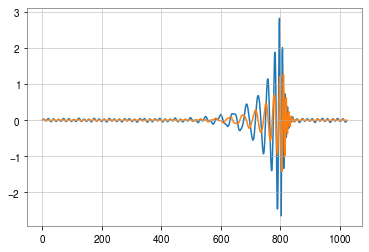

In [94]:
fig, ax  = plt.subplots()
index = 56
ax.plot(data["y_data_noisefree"][index][0])
ax.plot(data["y_data_noisefree"][index][1])

In [69]:
post_dir = "/home/joseph.bayley/public_html/CBC/vitamin_O4MDC/BBH_1024.0Hz_1s_fullparam_massconstrain_corr/vitamin_basic_run0_1024_1s_4conv64_64_32_16_jointm1m2_ramp400_noregularization_AdamW_notimeaug_chirpm_mratio/comp_posterior/posterior_samples_epoch_500_event_0_0.txt"

In [70]:
vit_post_dir = "/home/joseph.bayley/public_html/CBC/vitamin_O4MDC/BBH_1024.0Hz_1s_fullparam_massconstrain_corr/vitamin_basic_run0_1024_1s_4conv64_64_32_16_jointm1m2_ramp400_noregularization_AdamW_notimeaug_chirpm_mratio/comp_posterior/posterior_samples_epoch_500_event_0_vit.txt"

In [71]:
norm_post_dir = "/home/joseph.bayley/public_html/CBC/vitamin_O4MDC/BBH_1024.0Hz_1s_fullparam_massconstrain_corr/vitamin_basic_run0_1024_1s_4conv64_64_32_16_jointm1m2_ramp400_noregularization_AdamW_notimeaug_chirpm_mratio/comp_posterior/posterior_samples_epoch_500_event_0_normed.txt"

In [77]:
norm_post_dir1 = "/home/joseph.bayley/public_html/CBC/vitamin_O4MDC/BBH_1024.0Hz_1s_fullparam_massconstrain_corr/vitamin_basic_run0_1024_1s_4conv64_64_32_16_jointm1m2_ramp400_noregularization_AdamW_notimeaug_chirpm_mratio/comp_posterior/posterior_samples_epoch_500_event_1_normed.txt"

In [72]:
with open(post_dir,"r") as f:
    post_samp = np.loadtxt(f)

In [73]:
with open(vit_post_dir,"r") as f:
    vit_post_samp = np.loadtxt(f)

In [78]:
with open(norm_post_dir,"r") as f:
    norm_post_samp = np.loadtxt(f)
with open(norm_post_dir1,"r") as f:
    norm_post_samp1 = np.loadtxt(f)

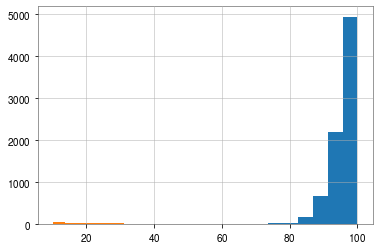

In [75]:
fig, ax = plt.subplots()
hst = ax.hist(post_samp[:,0])
hst = ax.hist(vit_post_samp[:,0])

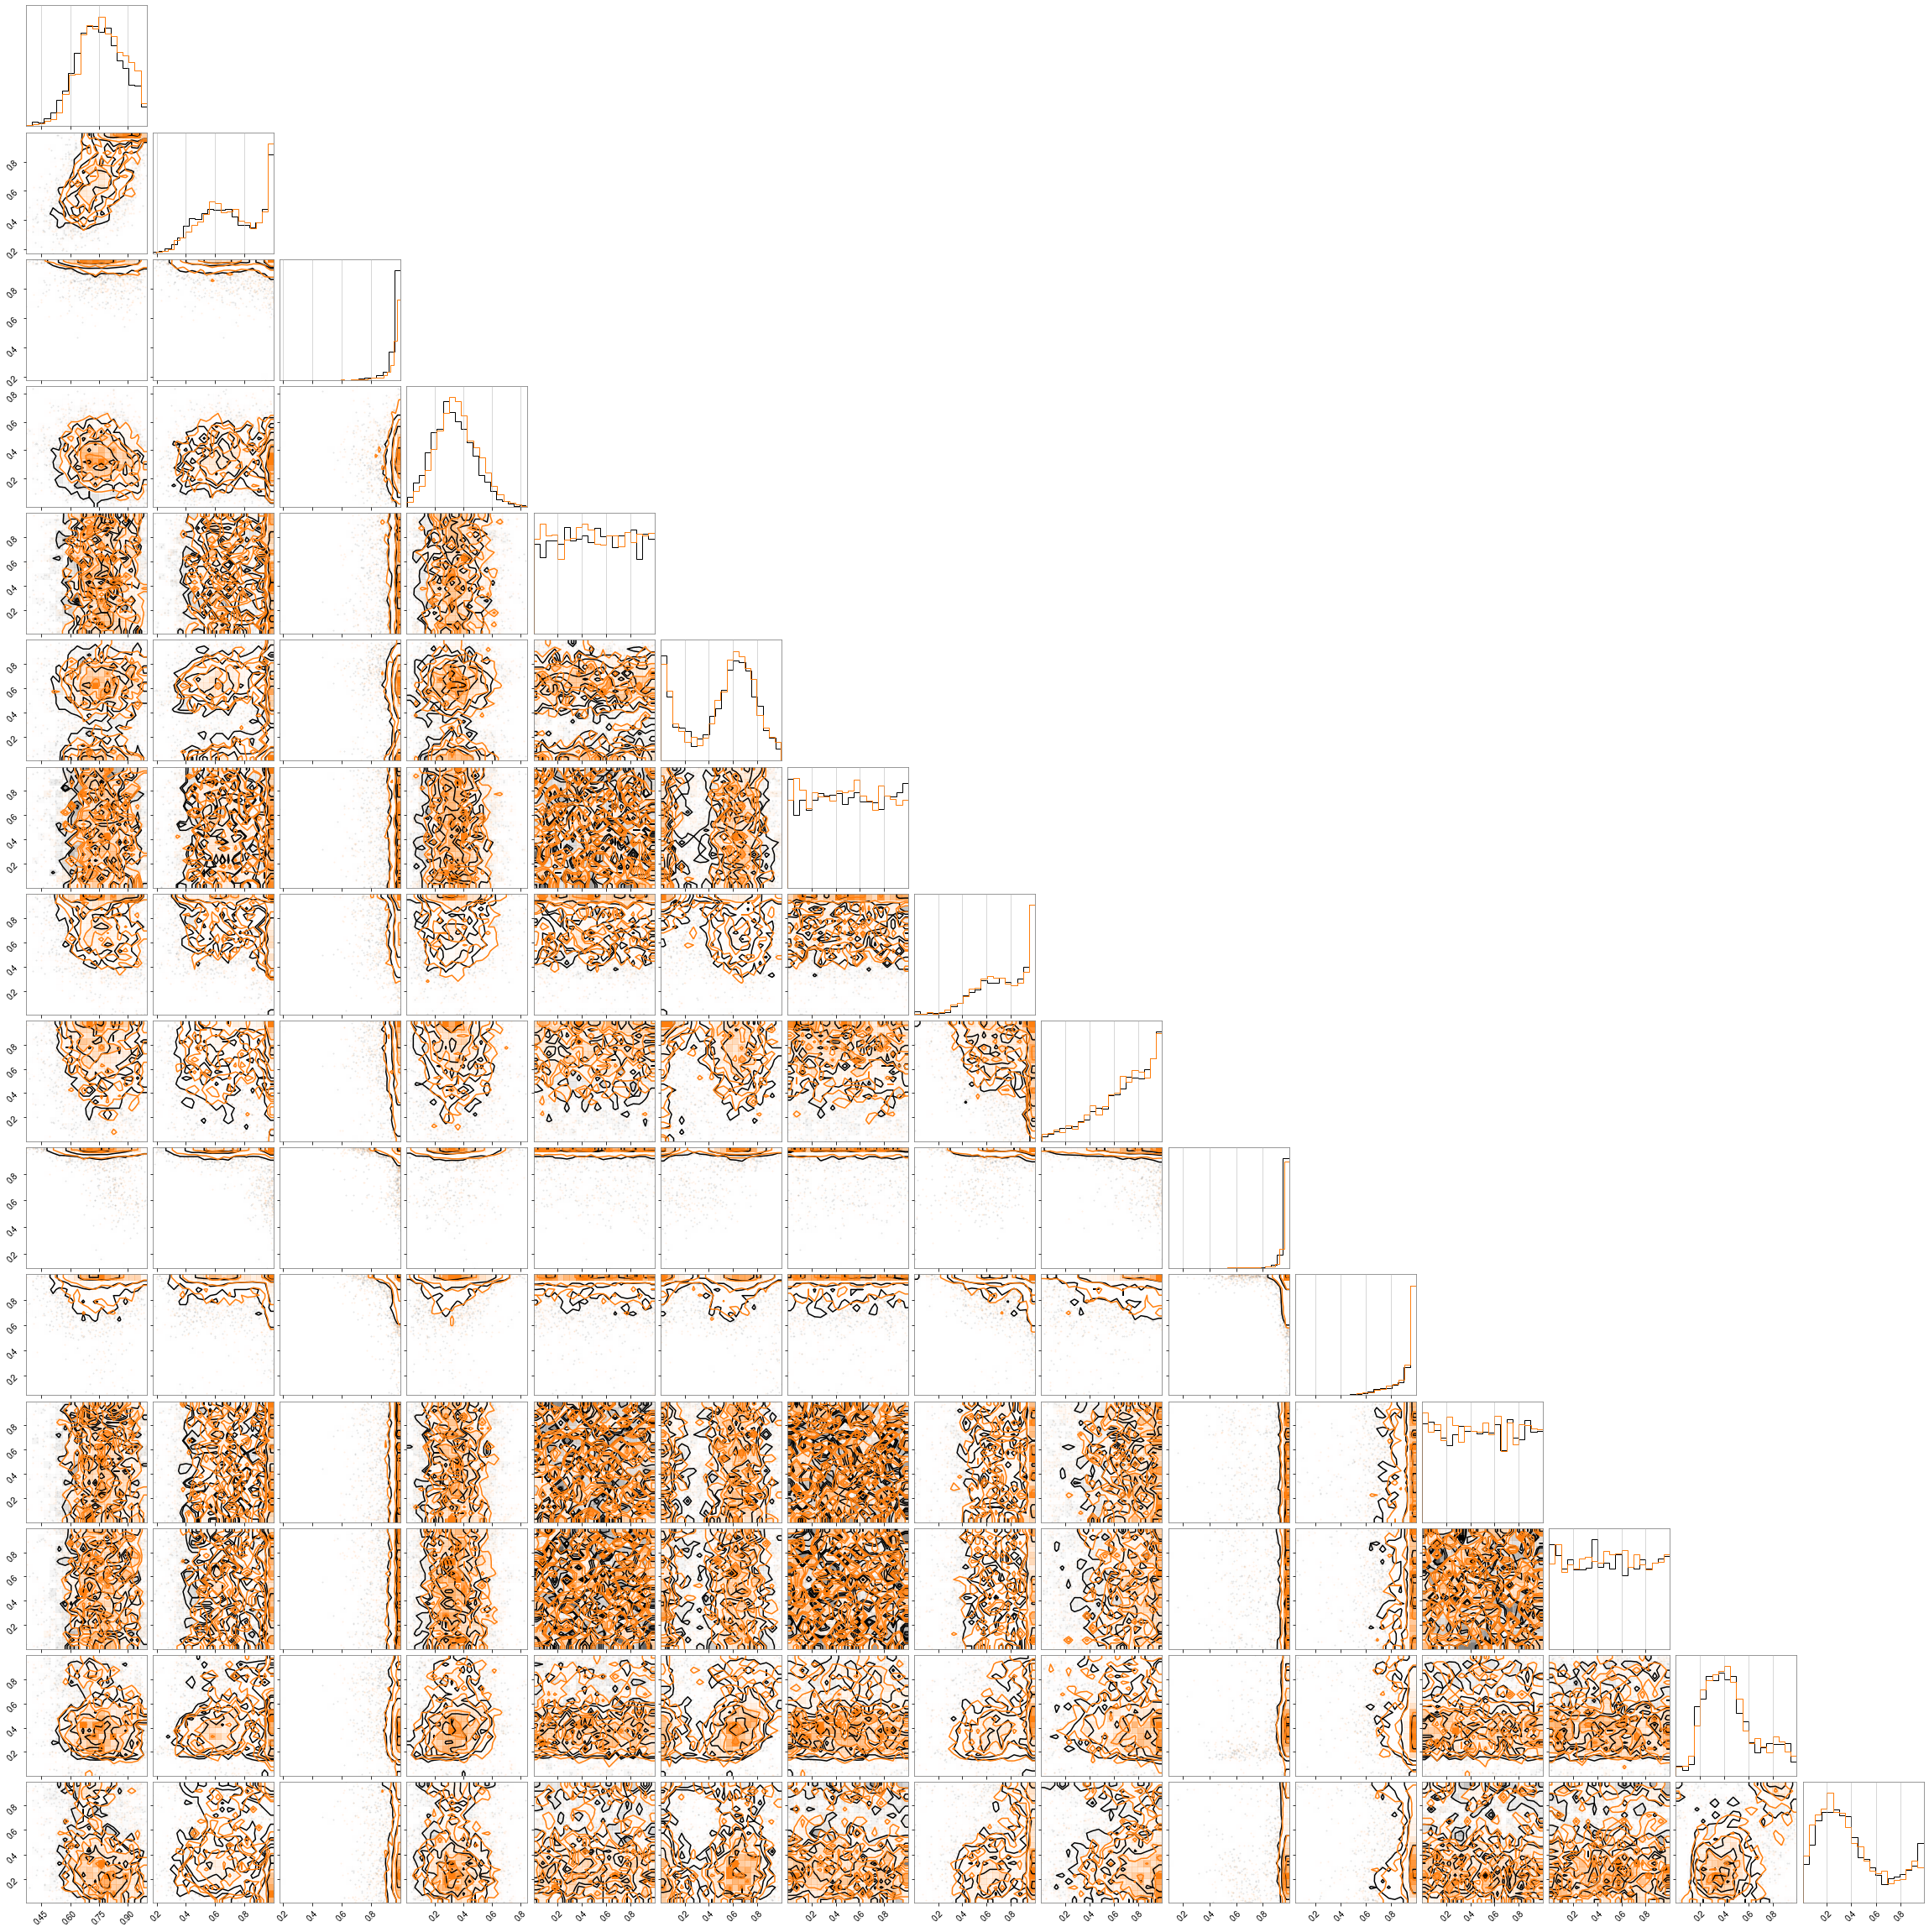

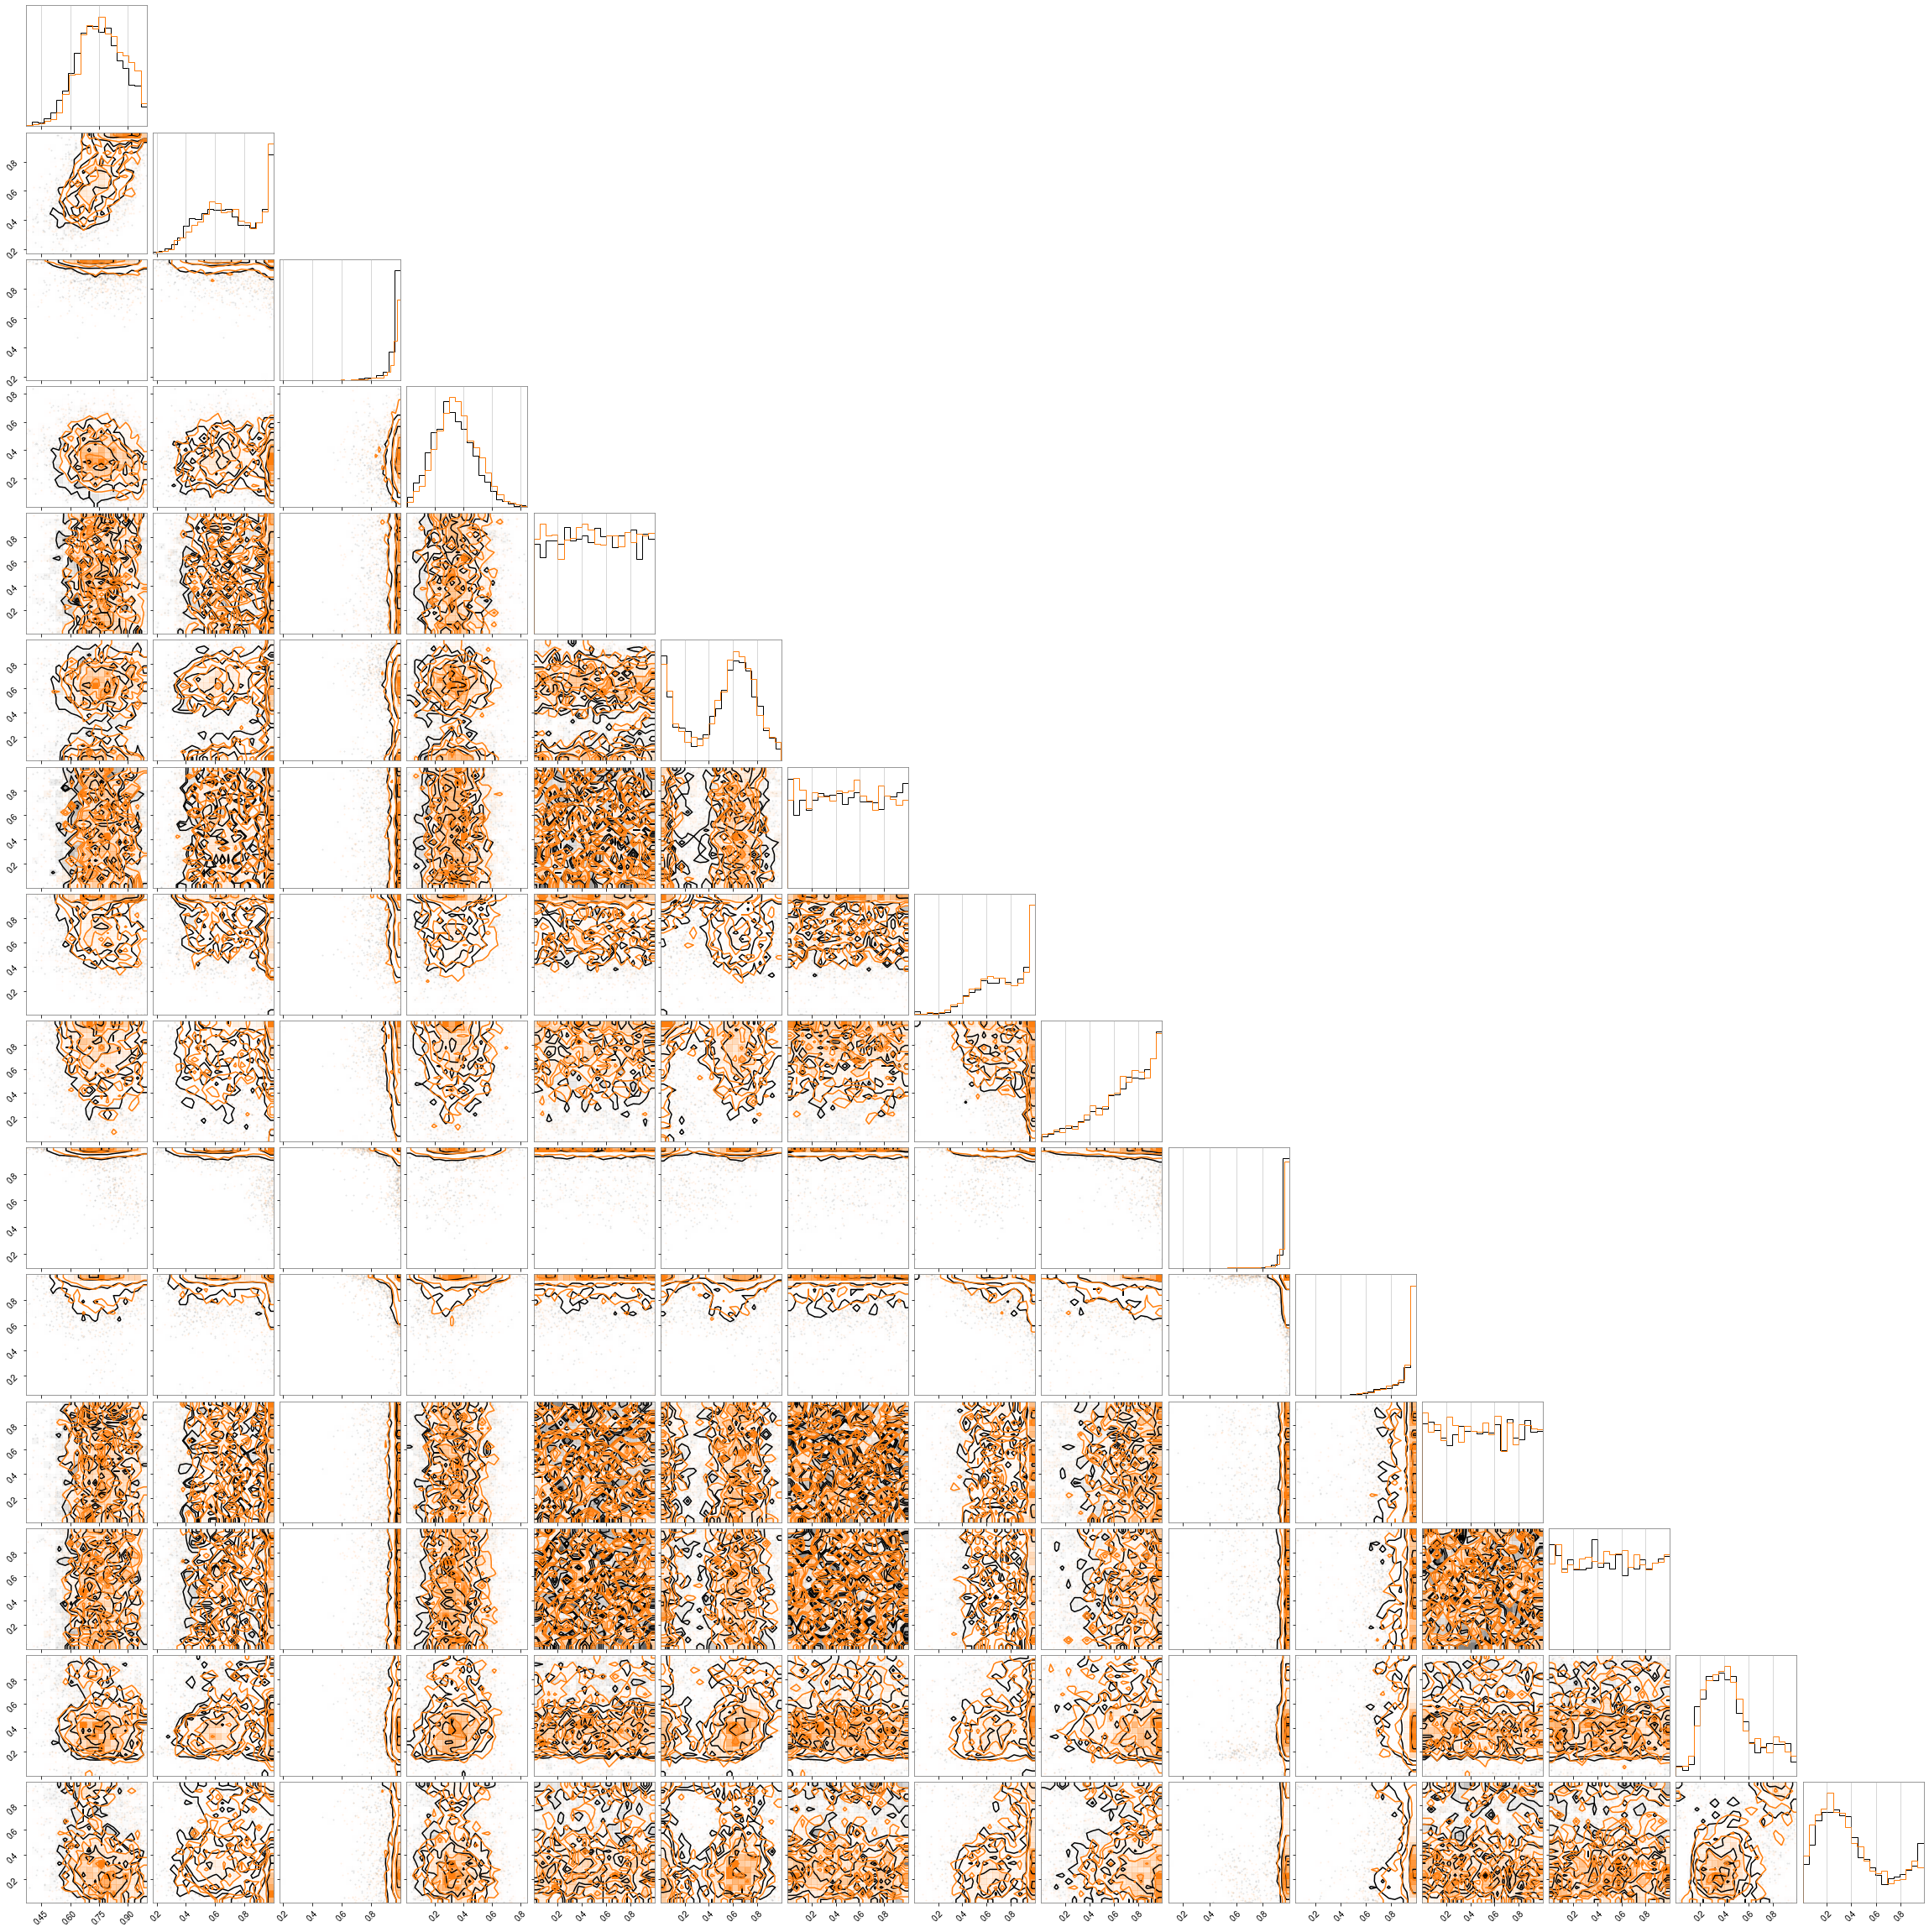

In [80]:
fg = corner.corner(norm_post_samp)
corner.corner(norm_post_samp1, fig = fg, color = "C1")

In [3]:
import h5py

In [7]:
testfile = "/home/joseph.bayley/data/CBC/O4/test_sets_gaussnoise/1024Hz_1s_full_15par_2det_lowmass/test_waveforms/1024Hz_1s_full_15par_2det_lowmass_0.h5py ..."

In [8]:
test = h5py.File(testfile)

OSError: Unable to open file (file signature not found)

In [6]:
test.keys()

<KeysViewHDF5 ['a_1_post', 'a_2_post', 'dec_post', 'geocent_time_post', 'log_likelihood_post', 'log_prior_post', 'luminosity_distance_post', 'mass_1_post', 'mass_2_post', 'noisefree_waveform', 'noisy_waveform', 'phase_post', 'phi_12_post', 'phi_jl_post', 'psi_post', 'ra_post', 'runtime', 'theta_jn_post', 'tilt_1_post', 'tilt_2_post']>

In [ ]:
test[]